# Business Objective: 

## The fundamental goal here is to model the CO2 emissions as a function of several car engine features

## Data Set Details: The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385.

### In that way, this problem has the 12 following variables:

1. make, car brand under study.
2. model, the specific model of the car.
3. vehicle_class, car body type of the car.
4. engine_size, size of the car engine, in Liters.
5. cylinders, number of cylinders.
6. transmission, "A" for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for'Continuously variable', "M" for 'Manual'.
7. fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.
8. fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.
9. fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers.
10. fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.
11. fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).
12. co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

## importing libriaries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import os
os.chdir("C:/Users/anvesh/Desktop/projects")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [2]:
#loading the data set
data=pd.read_csv('co2_emissions.csv')

In [3]:
#displaying the first two rows of the data set
data.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221


In [4]:
data.shape

(7385, 12)

# EDA

In [5]:
transmission_type = {"A":'Automatic', "AM":'Automated manual',"AS" :'Auto(select shift)', "AV" :'Continuously variable', "M":'Manual'}
fuel_type={"X" : 'Regular gasoline', "Z" : 'Premium gasoline', "D" : 'Diesel', "E" : 'Ethanol (E85)', "N" : 'Natural gas'}

In [6]:
data['fuel_type']=data['fuel_type'].replace(fuel_type)
data['transmission']=data['transmission'].replace(transmission_type)

In [7]:
data.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,Auto(select shift),Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221


In [8]:
#getting the basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [9]:
#summary statistics of the data set
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [10]:
data.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,7385,7385,7385,7385,7385
unique,42,2053,16,5,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,Auto(select shift),Regular gasoline
freq,628,32,1217,3127,3637


## We can observe that 
- The dataset has 7385 Rows and 12 Coloumns
- The 4 Columns are of type 'Float'
- The 3 Columns are of type 'Int'
- The 5 Columns are of type 'Object'(Categorical)'

- The average Co2 emissions across the dataset is 250.59 gm/Km
- The Fuel consumption is found to be greater in city than highway
- There are 42 different makers in the dataset , out of which Ford has the highest number of entries
- There are 2053 different models in the dataset , out of which F-150 FFV 4X4 has highest entries
- There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries
- There are 5 different transmission type in the dataset , out of which Auto(Select Shift) has highest entries
- There are 5 different Fuel types in the dataset , out of which most of the cares run on Regular gasoline

## Check for Null Values

In [11]:
data.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

- There are no Null Values in the Dataset , missing value imputation is not required

In [12]:
duplicates=data.duplicated().sum()

In [13]:
print("The no of duplicates in this data set are{}".format(duplicates))

The no of duplicates in this data set are1112


In [14]:
# Dropping Duplicates using drop_duplicates
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(6273, 12)

In [15]:
data.reset_index(inplace=True)

In [16]:
data.drop(['index'],inplace=True,axis=1)

# Seperating Numerical and Categorical Columns

In [17]:
categorical_columns=[]
numerical_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [18]:
categorical_columns

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

In [19]:
numerical_columns

['engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'co2_emissions']

# Visualization

- Numerical Visualization
    - Histogram
    - pairplot / scatterplot - x->input variable ,y->target variable
    - boxplot - to detect outliers 

## Univariate Analysis

Skewness-> 0.8109634973059867
Kurtosis-> -0.15317073013177973


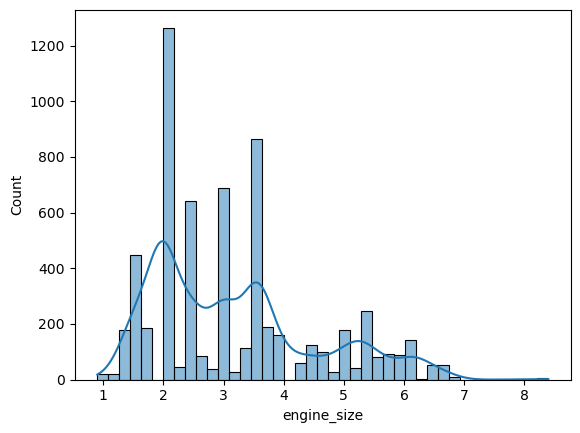

Skewness-> 1.106650710778432
Kurtosis-> 1.4350759501372607


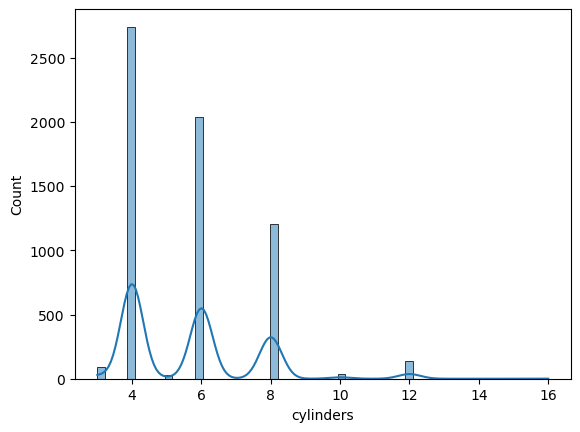

Skewness-> 0.841856275830459
Kurtosis-> 1.204763947078427


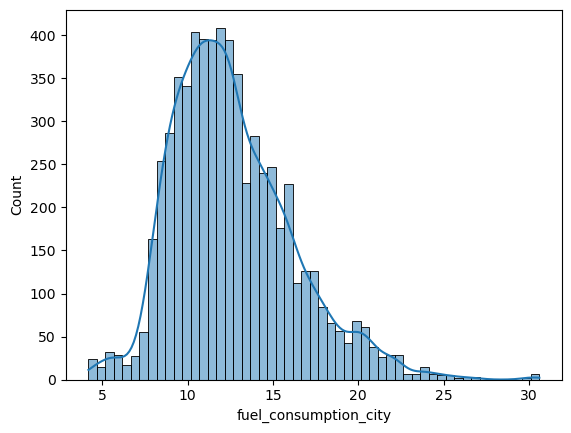

Skewness-> 1.110217266974703
Kurtosis-> 2.0054631690048454


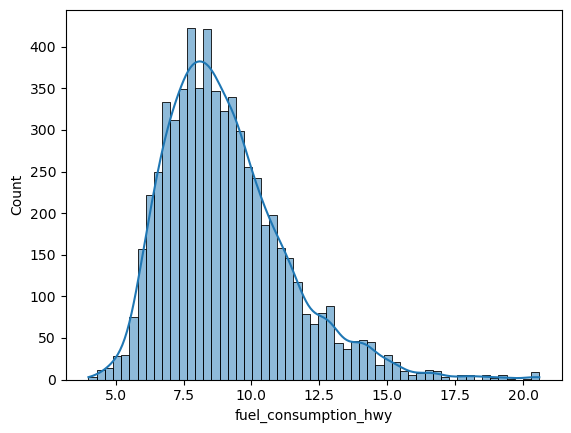

Skewness-> 0.9264095868150038
Kurtosis-> 1.4013798310237942


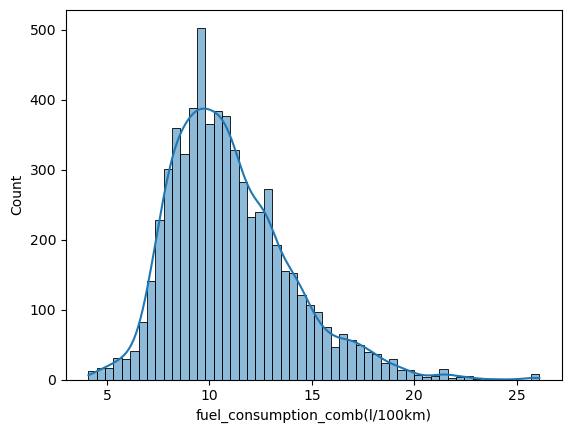

Skewness-> 0.9152769010295129
Kurtosis-> 2.2885420634399143


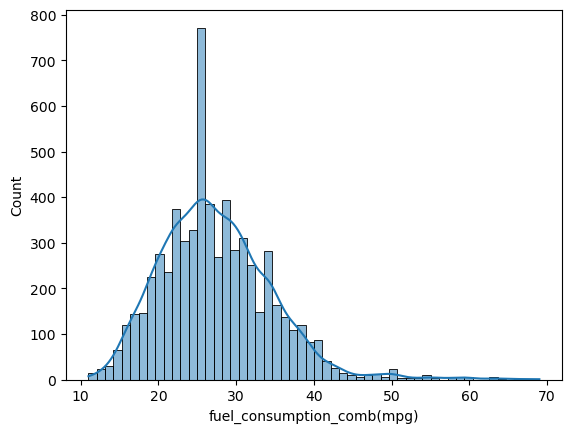

Skewness-> 0.5588650833129282
Kurtosis-> 0.44397799715675124


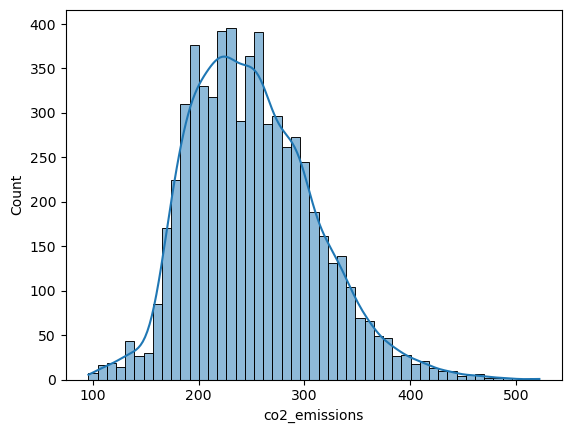

In [20]:
for i in numerical_columns:
    sns.histplot(data[i],kde=True)
    print("Skewness->",data[i].skew())
    print("Kurtosis->",data[i].kurt())
    plt.show()

- 'fuel_consumption_city', 'fuel_consumption_hwy','fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'co2_emissions are Somewhat normally distributed with some Skewness
- 'engine_size','cylinders' are not normally distributed

## Categorical Columns Visualization

In [21]:
for i in categorical_columns:
    print("Unique Values",data[i].value_counts().index)
    print("Counts",data[i].value_counts().values)
    print("***************************************")

Unique Values Index(['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'GMC', 'TOYOTA',
       'AUDI', 'NISSAN', 'MINI', 'JEEP', 'KIA', 'VOLKSWAGEN', 'HYUNDAI',
       'DODGE', 'HONDA', 'CADILLAC', 'LEXUS', 'MAZDA', 'SUBARU', 'JAGUAR',
       'VOLVO', 'BUICK', 'INFINITI', 'LINCOLN', 'LAND ROVER', 'MITSUBISHI',
       'RAM', 'CHRYSLER', 'FIAT', 'MASERATI', 'ACURA', 'ROLLS-ROYCE',
       'ASTON MARTIN', 'LAMBORGHINI', 'BENTLEY', 'SCION', 'ALFA ROMEO',
       'GENESIS', 'SMART', 'SRT', 'BUGATTI'],
      dtype='object')
Counts [575 515 501 365 296 289 274 263 213 200 200 192 187 184 180 159 141 129
 127 119 118 118  92  87  81  76  73  72  64  56  52  51  48  39  37  35
  21  19  14   7   2   2]
***************************************
Unique Values Index(['F-150 FFV', 'F-150 FFV 4X4', 'MUSTANG', 'FOCUS FFV', 'F-150 4X4',
       'F-150', 'SONIC 5', 'ATS', 'JETTA', 'COMPASS',
       ...
       'STINGER AWD', 'AVENTADOR S COUPE', 'AVENTADOR S ROADSTER',
       'HURACAN AWD', 'HURACAN SP

In [22]:
categorical_columns

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

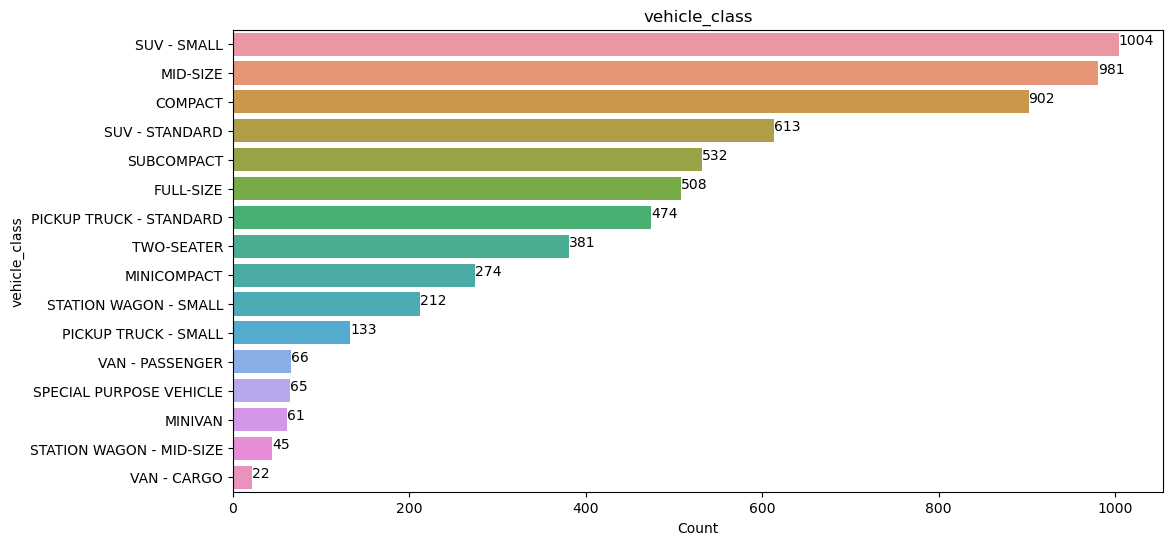

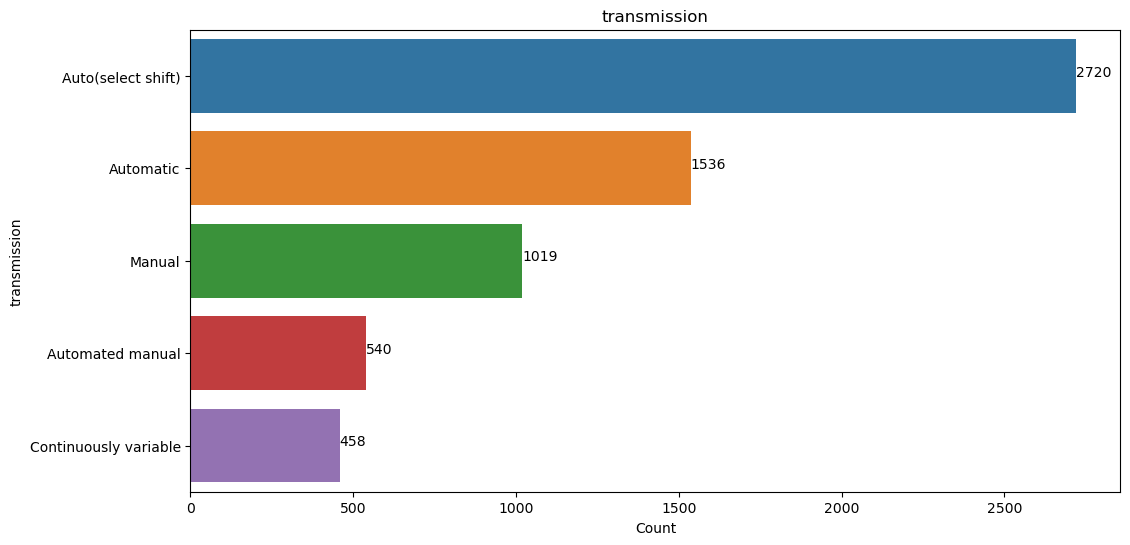

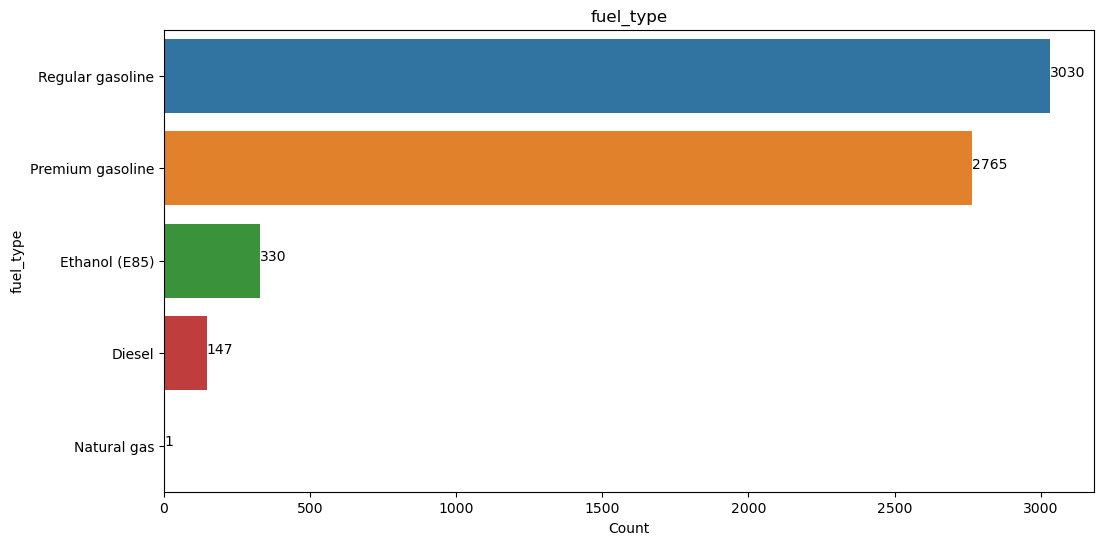

In [23]:
for i in ['vehicle_class', 'transmission', 'fuel_type']:
    plt.figure(figsize=(12,6))
    x=data[i].value_counts().index
    y=data[i].value_counts().values
    ax=sns.barplot(y=x,x=y)
    for j,v in enumerate(data[i].value_counts().values):
        ax.text(v,j,v)
    ax.set_xlabel("Count")
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

- There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries(959)
- There are 5 different transmission type in the dataset , most of the cars are Automatic(Select Shift) type (2633)
- There are 5 different Fuel types in the dataset , out of which most of the cars run on Regular gasoline(2869)

- While plotting the count for each vehicle class across each maker , we found out that SRT,Bugati and SMART makers have only one vehicle class type with less than 10 entries
- While Chervolet makers have different variants in the vehicle type with 13 types
- The distribution across few makers like are not evenly distributed "Jeep","RAM" and "Porchse"

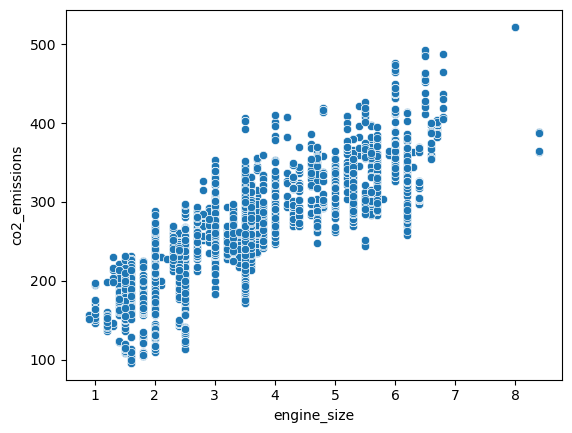

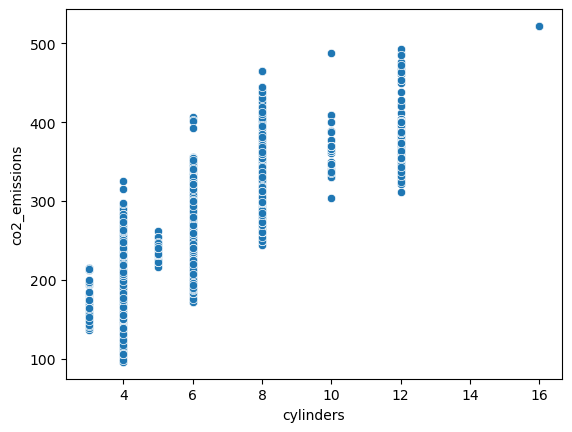

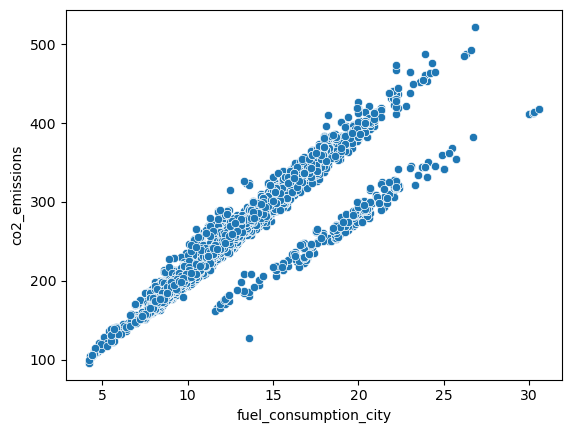

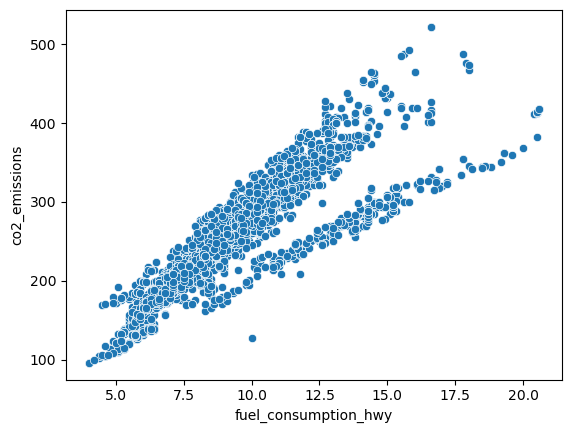

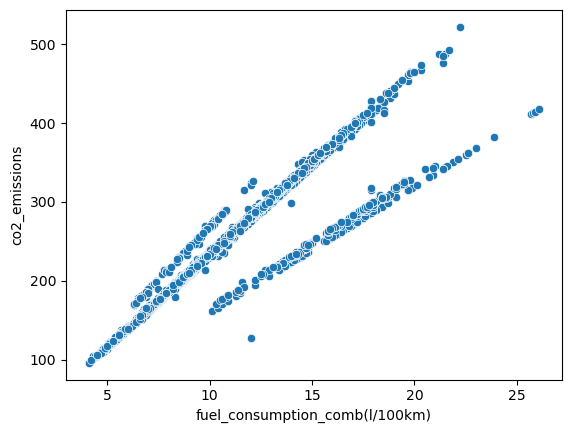

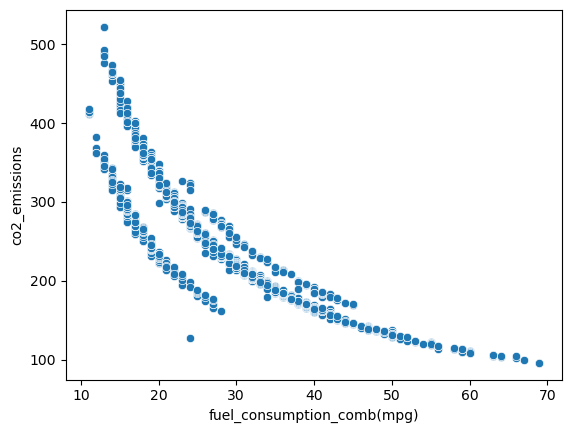

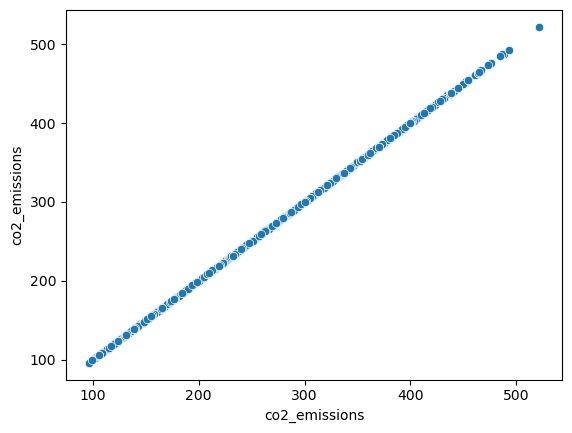

In [24]:
for i in numerical_columns:
    sns.scatterplot(x=data[i],y=data['co2_emissions'])
    plt.show()

Text(0, 0.5, 'Co2 emission')

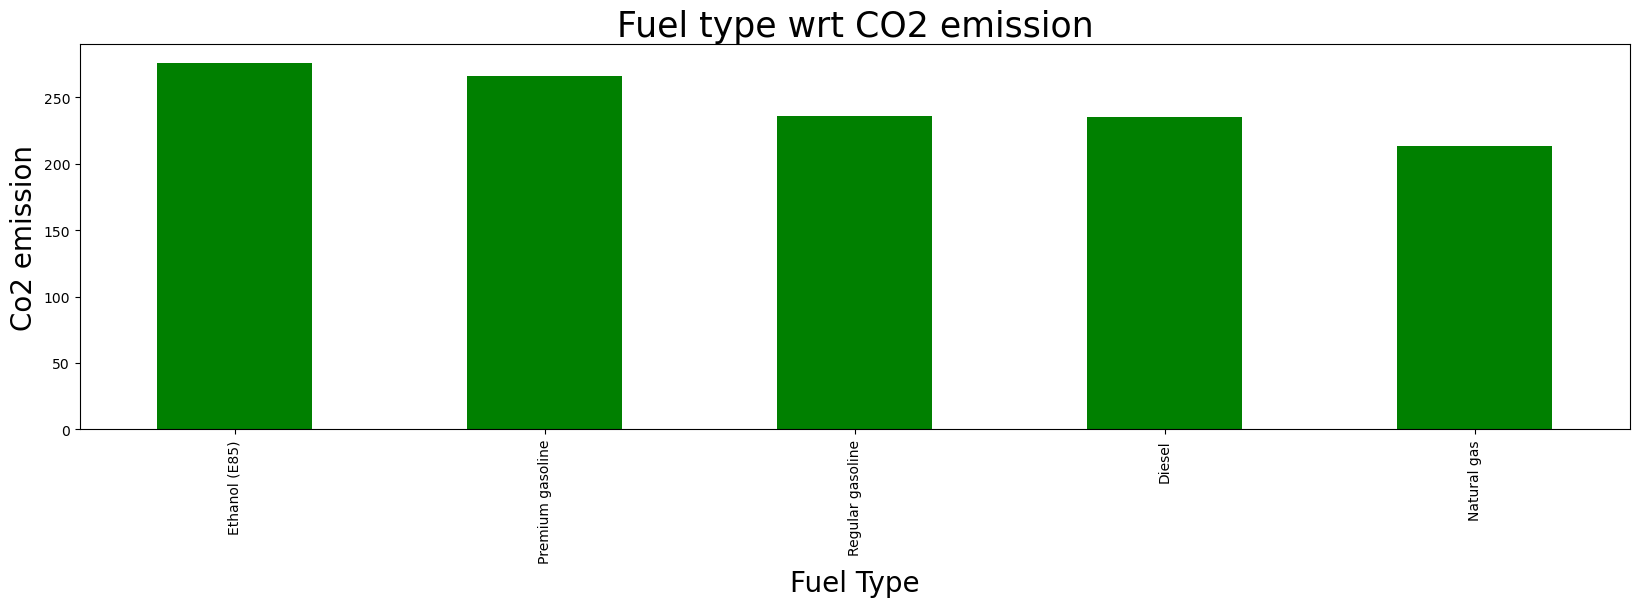

In [30]:
plt.figure(figsize=(20,5))
data
data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)

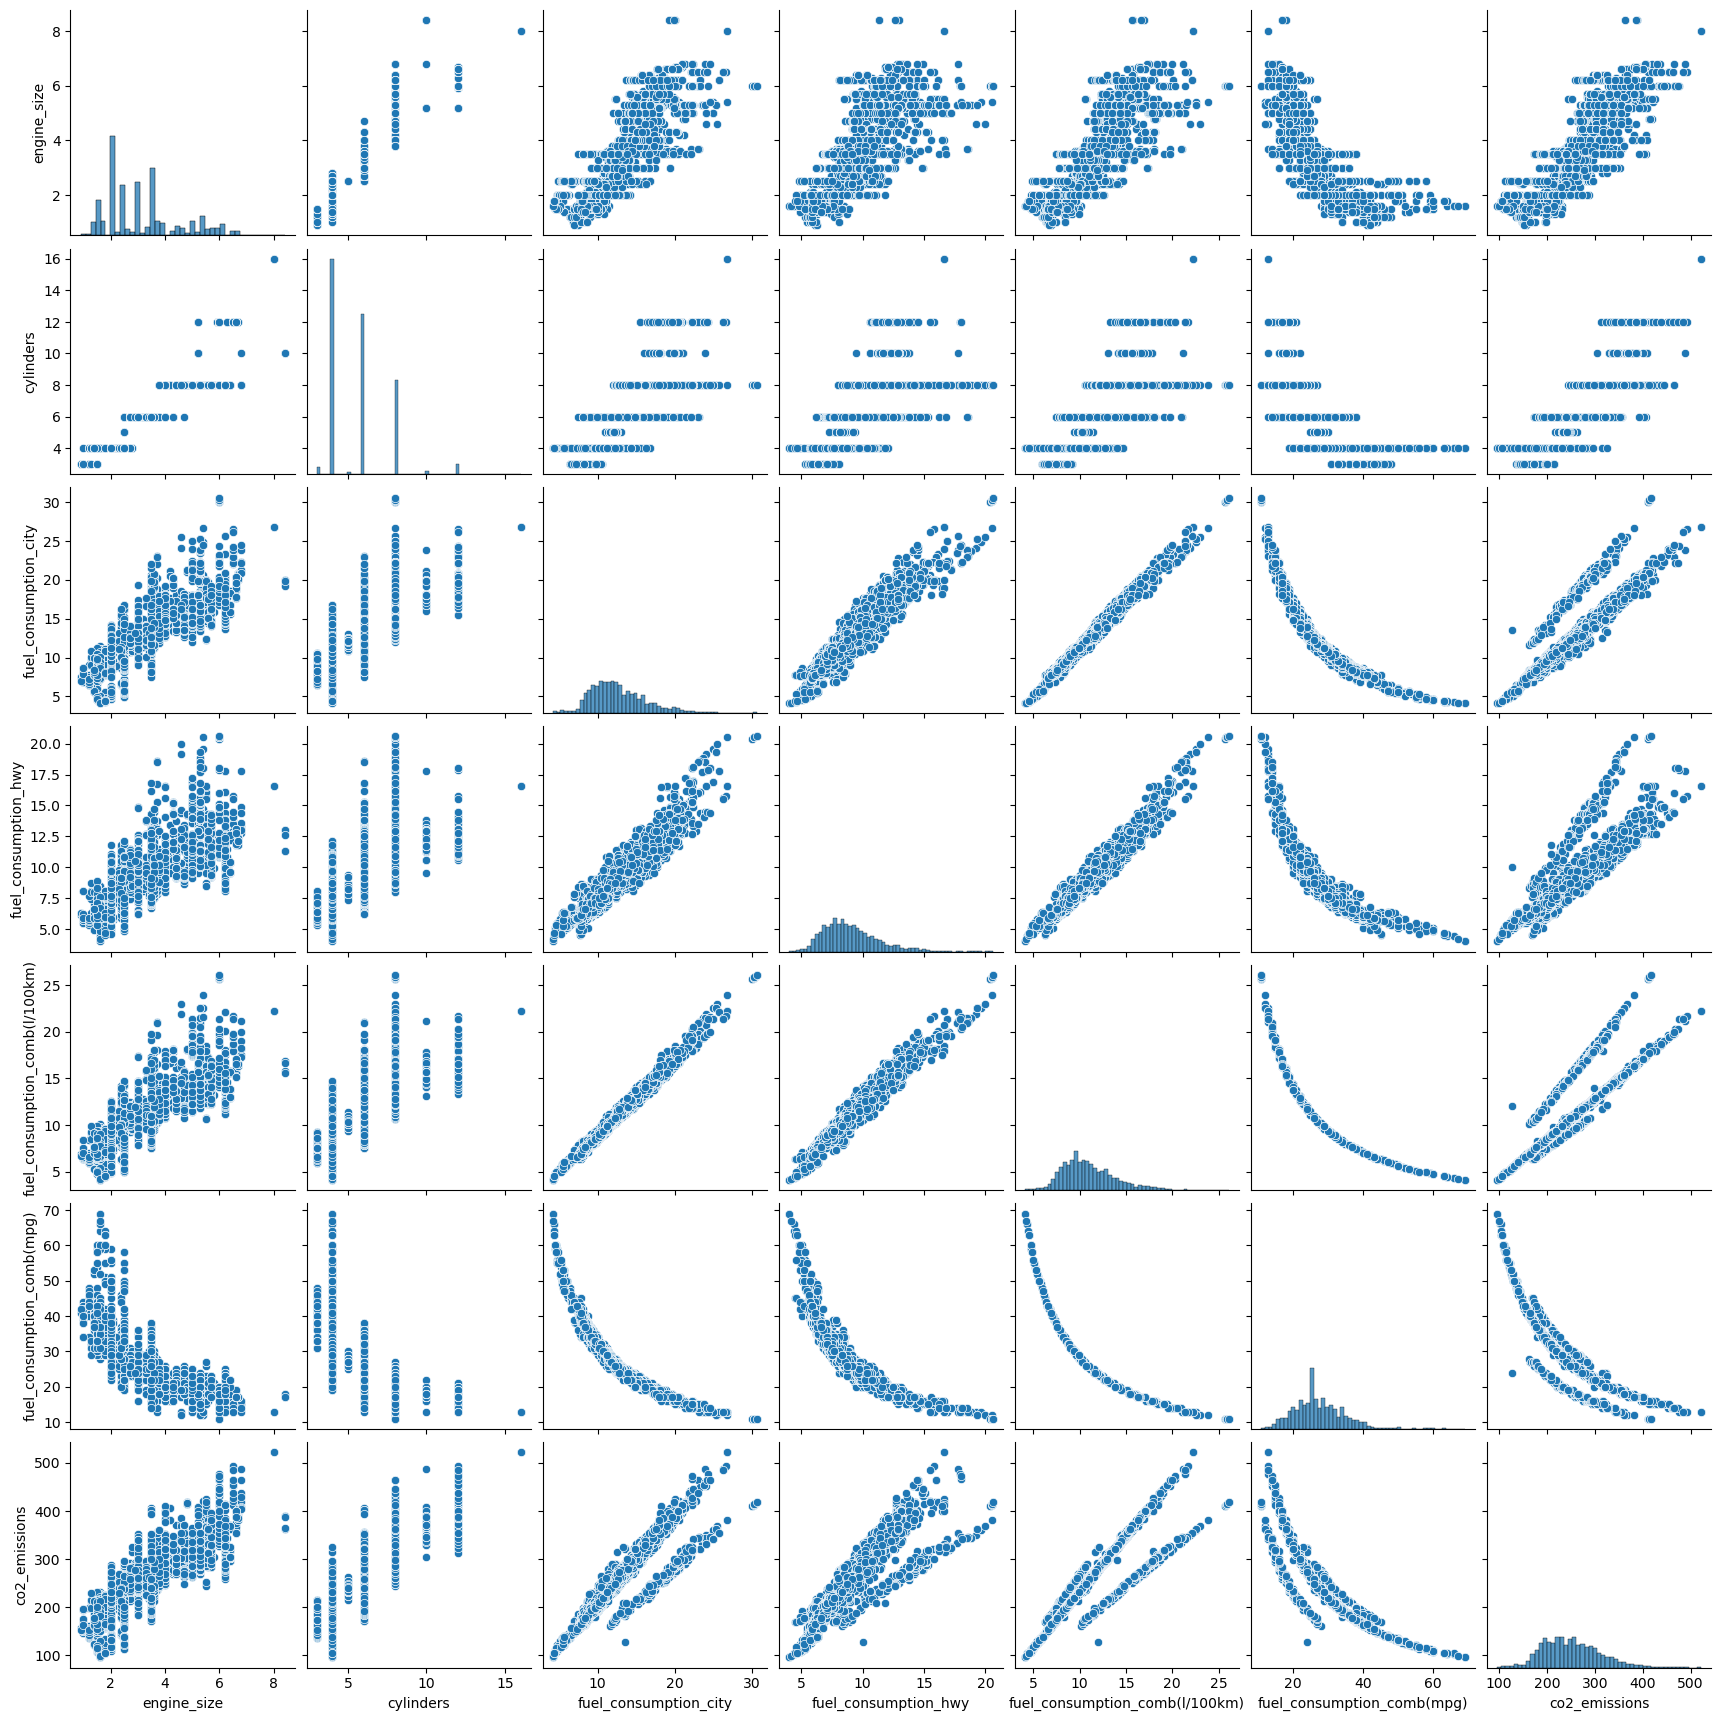

In [25]:
sns.pairplot(data)

In [ ]:
#Co2 has linear relationship with engine size and fuel consumption
#As engine size increases fuel consupmtion increases and no of cylnders increases,co2 emission increases
#Fuel consumption comb has perfect correlation with fuel consumption highway and fuel consumption city
#Fuel type Ethanol is more in co2 emission and the same fuel type is mostly used in city and highway hence co2 emission would be more
##As cylnders size increases Co2 emission increases
#Co2 emission is more for fuel type Ethanol
#Fuel consumption comb has inverse inverse relationship with co2 emission
#Co2 emission is generally increasing with increase in remaining features except fuel consumption comb

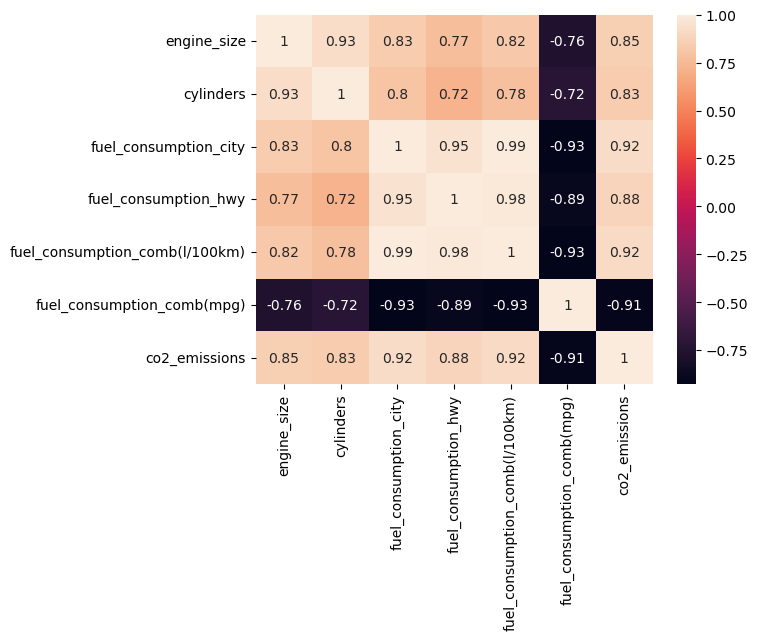

In [26]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
##co2_emission has high positive correlation with fuel_consumption_comb(0.92) and fuel_consumption_city(0.92)
#fuel consumption highway and city are also strongly correlated

In [27]:
print("Overall Average Co2_Emissions(gm/kg)",data['co2_emissions'].mean())

Overall Average Co2_Emissions(gm/kg) 251.24725011956002


In [33]:
####   Categorical Data v/s Target Variable

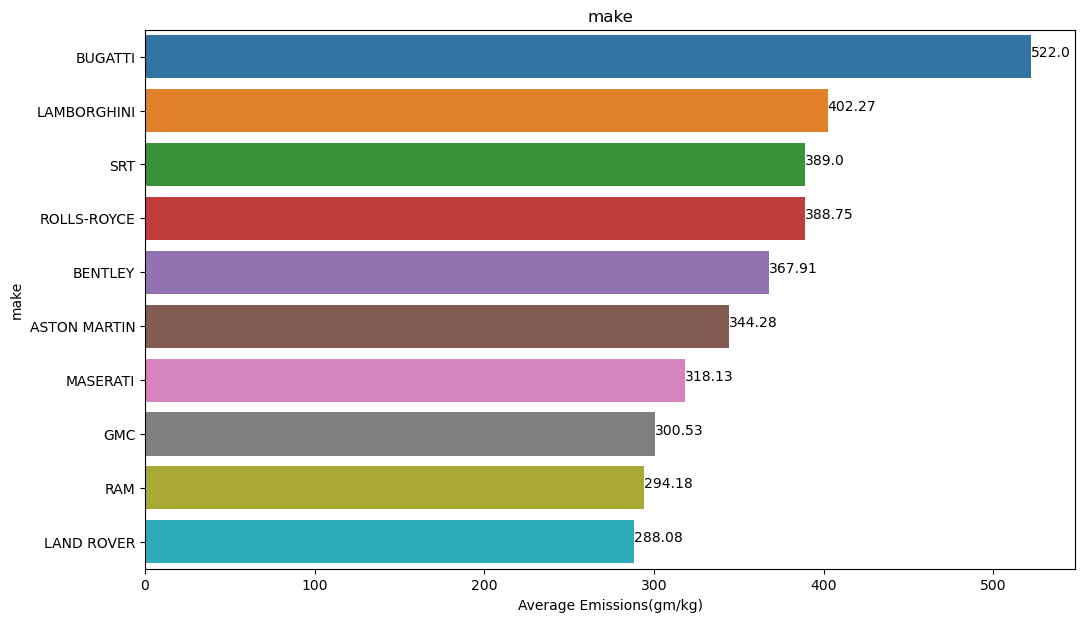

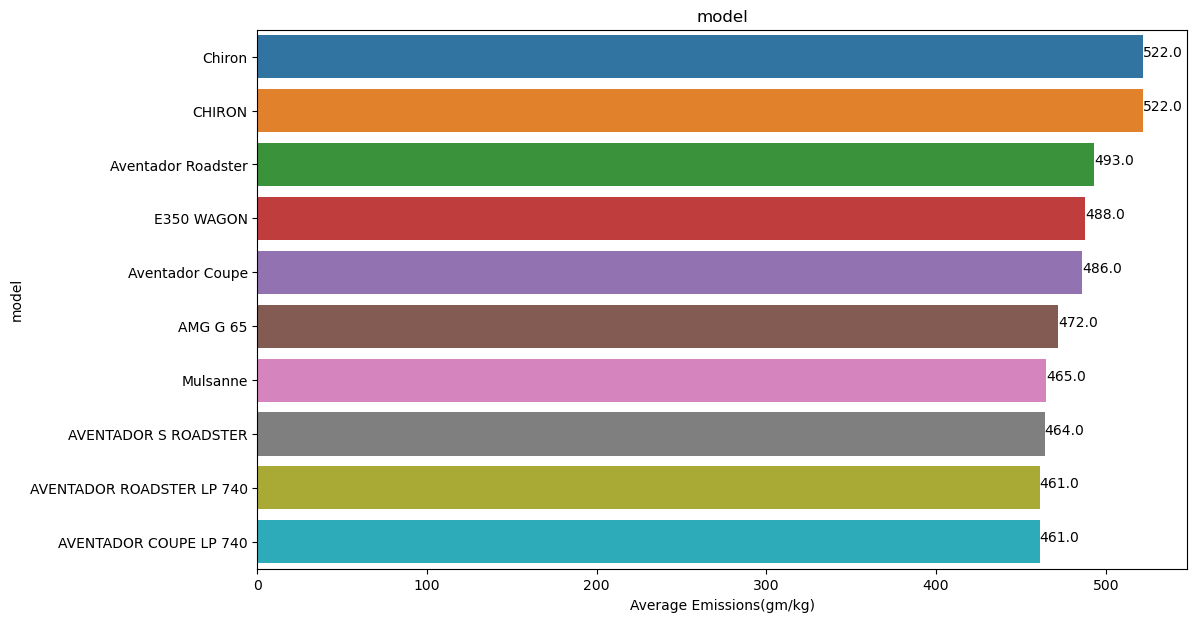

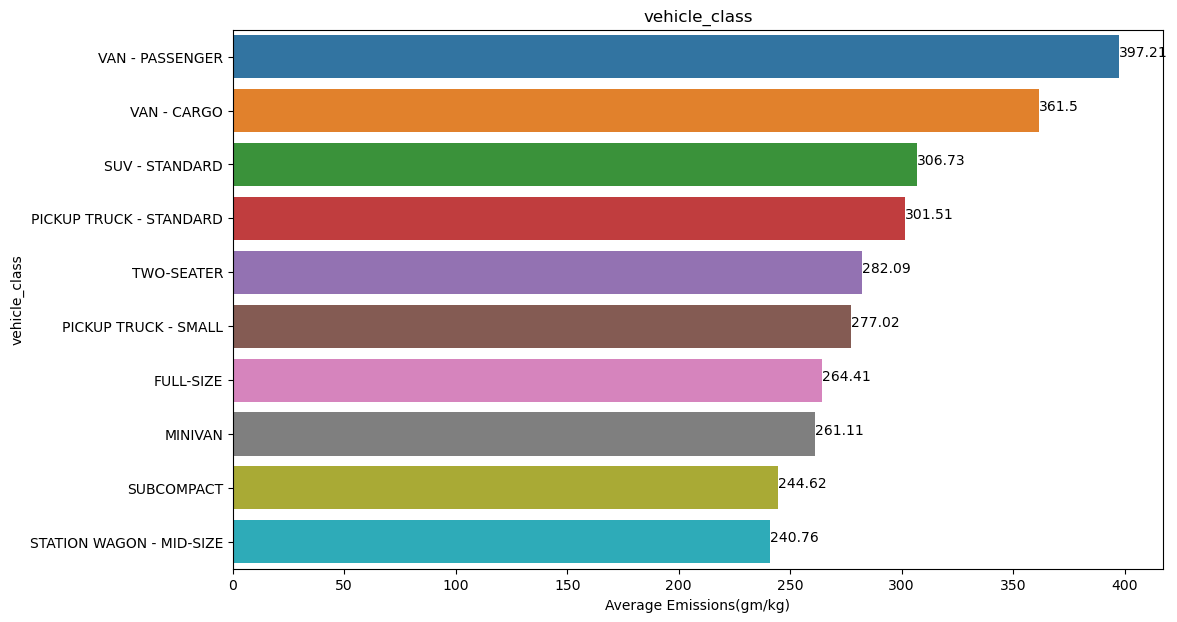

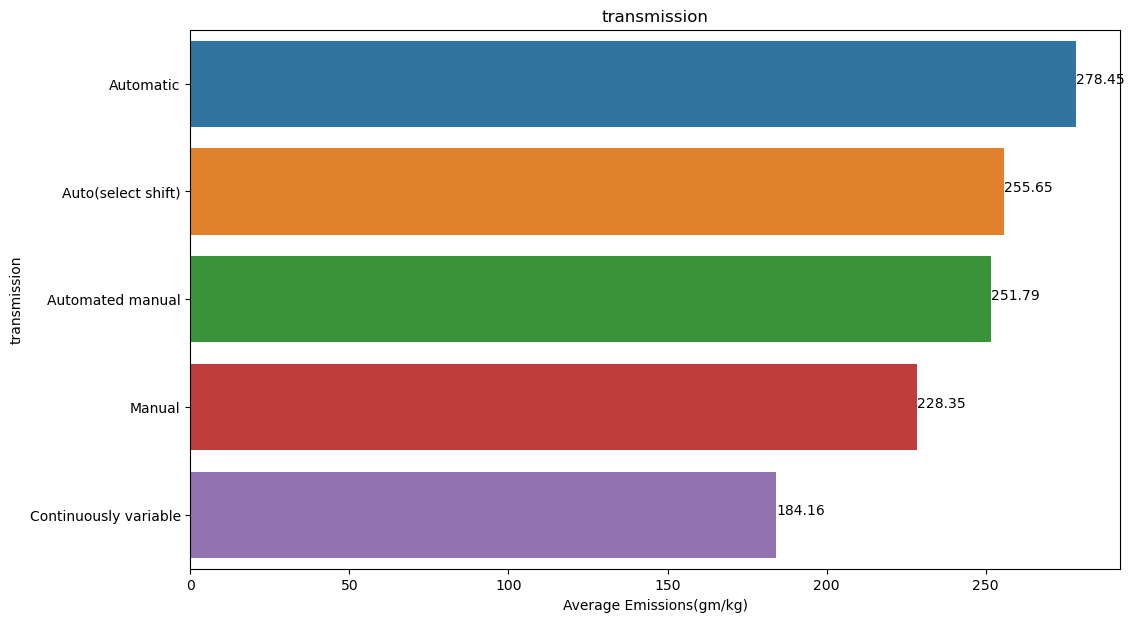

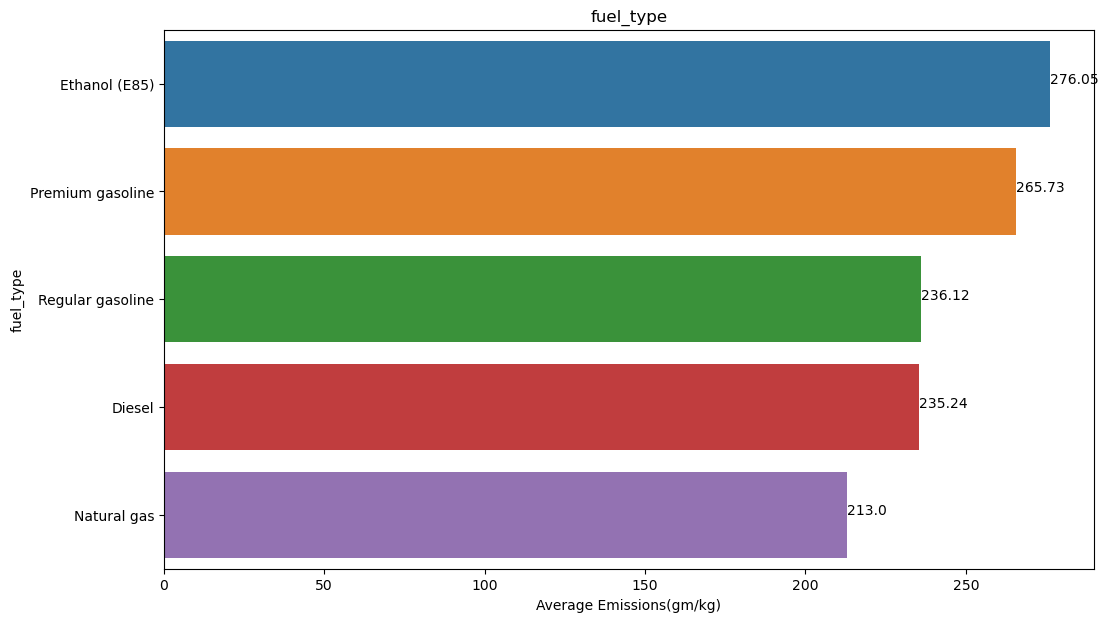

In [28]:
for i in categorical_columns:
    plt.figure(figsize=(12,7))
    grouped_data = data.groupby(i)
    make_list=[]
    count_list=[]
    for x,y in grouped_data:
        make_list.append(x)
        count_list.append(np.round(y.aggregate(np.mean)['co2_emissions'],2))
        grp_count=pd.DataFrame({i:make_list,'Average Emissions(gm/kg)':count_list})
        grp_count=grp_count.sort_values(by='Average Emissions(gm/kg)',ascending=False).reset_index(drop=True)
    ax=sns.barplot(x='Average Emissions(gm/kg)',y=i,data=grp_count.head(10))
    for j,v in enumerate(grp_count['Average Emissions(gm/kg)'].head(10).values):
        ax.text(v,j,v)
    ax.set_xlabel("Average Emissions(gm/kg)")
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

In [36]:
#From the above categorical plots , we see Bugatti being highest average Co2_emissions among makers
#we see Chiron being highest average Co2_emissions among Model
#we see Van - Passenger has highest average Co2_emissions among vehicle class , i.e. bigger the vehicle , higher the co2_emissions
#we see Automatic transmission type has the highest average Co2_emissions among all types
#Cars using Ethonal has highest Co2_emissions
#We see that only one car uses Natural Gas in the whole dataset
#Co2_emissions is positively Skewed , which implies that the co2_emission are lower than the average emission rate

## Bivariate analysis - Variation of Input Feature V/s Target Variable

In [29]:
data['Vehicle_Class_Type'] = data['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'hatchback')

In [30]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'sedan')

In [31]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'suv')

In [32]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'truck')

In [33]:
data['Vehicle_Class_Type'].unique()

array(['hatchback', 'suv', 'sedan', 'truck'], dtype=object)

In [34]:
data = data.drop(['vehicle_class'], axis=1)

Text(0, 0.5, 'Co2 emission')

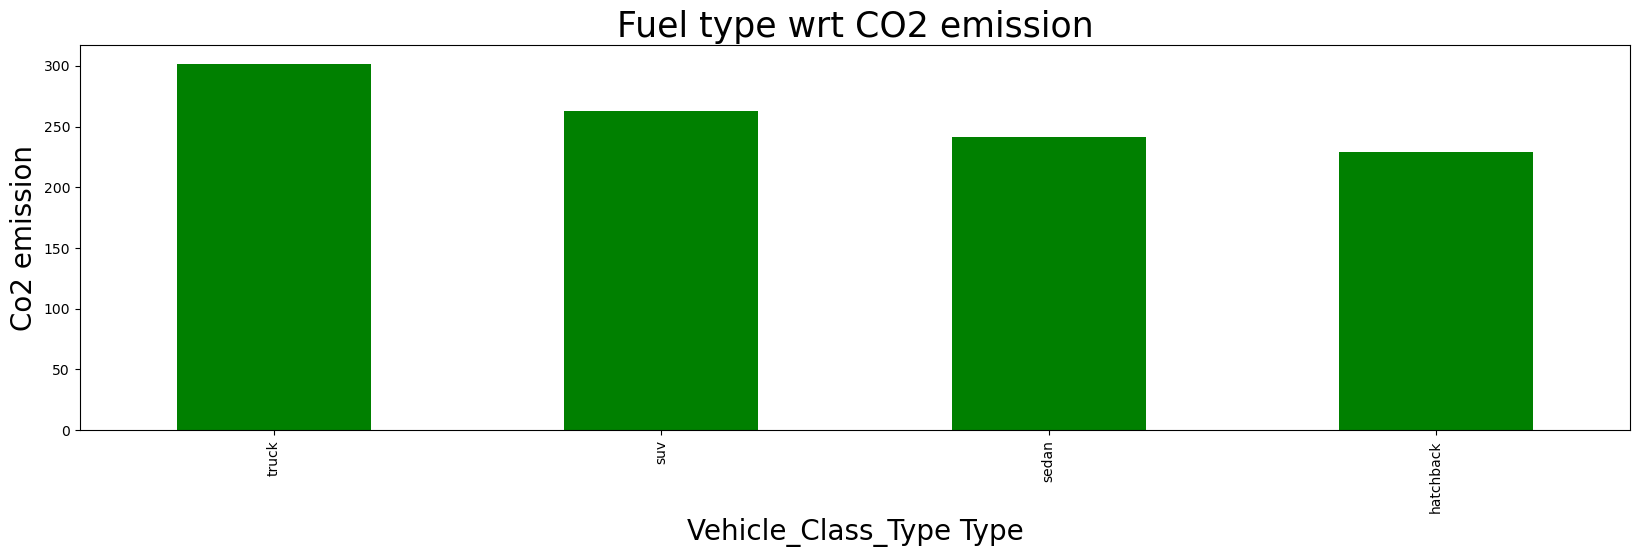

In [35]:
plt.figure(figsize=(20,5))
data.groupby('Vehicle_Class_Type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')
plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle_Class_Type Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)

In [ ]:
#Trucks are more in co2 emissions

In [36]:
data["make"].nunique()

42

In [37]:
data['make_1'] = data['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')

In [38]:
data['make_1'] = data['make_1'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK',
                                                         'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                                         'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ',
                                                         'MINI', 'SMART', 'VOLVO'],
                                                         'Premium')

In [39]:
data['make_1'] = data['make_1'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')

In [40]:
data['make_1'] = data['make_1'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [41]:
data['make_1'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [42]:
data['make_1'].value_counts()

General    2767
Premium    2731
Sports      546
Luxury      229
Name: make_1, dtype: int64

In [43]:
data = data.drop(['make'], axis=1)

In [44]:
data.drop(['model'],axis=1,inplace=True)

In [45]:
data.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Vehicle_Class_Type,make_1
0,2.0,4,Auto(select shift),Premium gasoline,9.9,6.7,8.5,33,196,hatchback,Luxury
1,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,hatchback,Luxury
2,1.5,4,Continuously variable,Premium gasoline,6.0,5.8,5.9,48,136,hatchback,Luxury
3,3.5,6,Auto(select shift),Premium gasoline,12.7,9.1,11.1,25,255,suv,Luxury
4,3.5,6,Auto(select shift),Premium gasoline,12.1,8.7,10.6,27,244,suv,Luxury


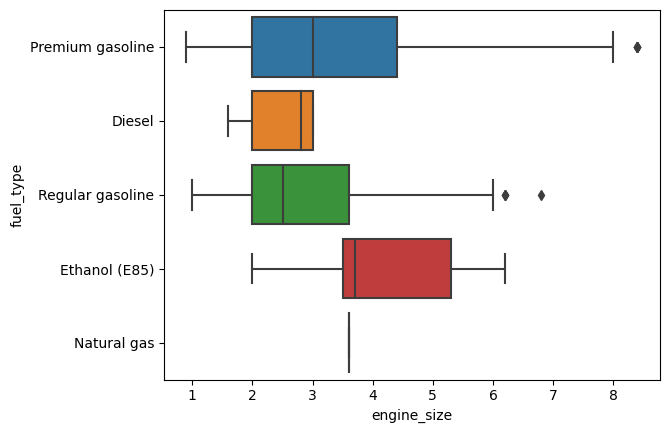

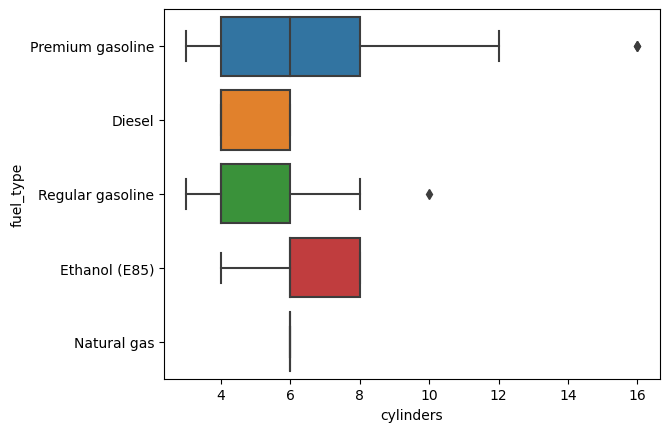

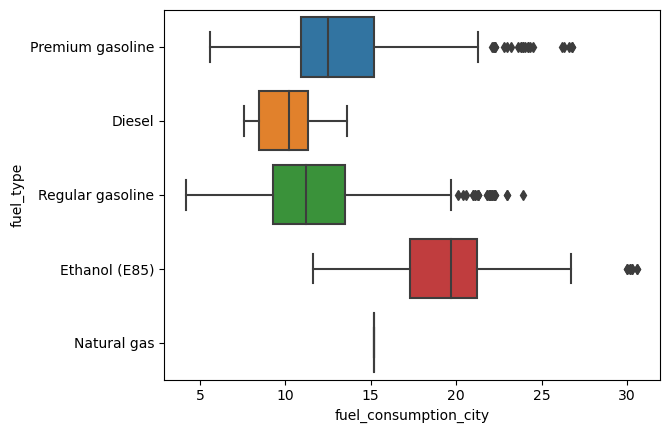

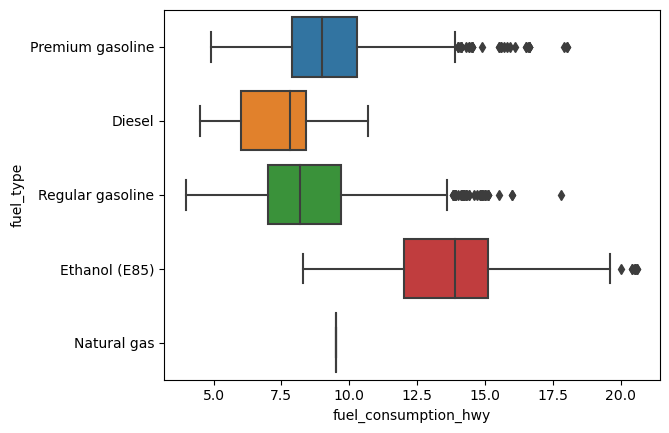

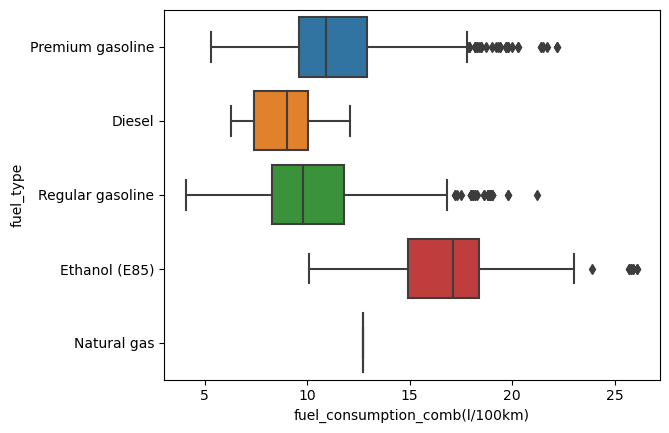

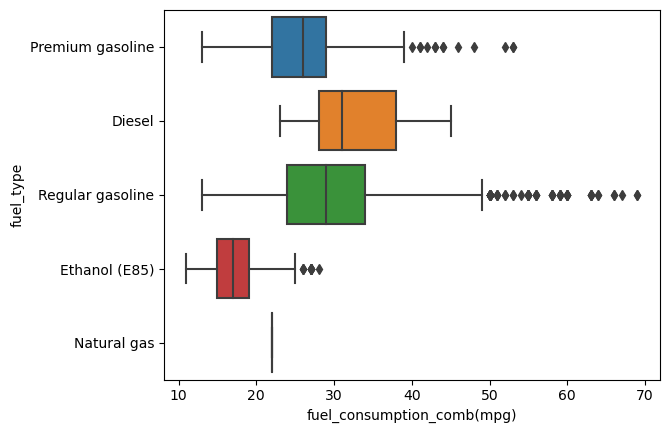

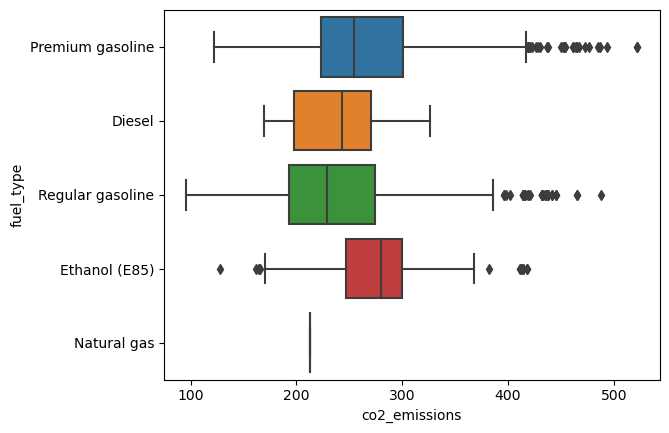

In [46]:
for i in numerical_columns:
    sns.boxplot(data=data,x=i,y='fuel_type')
    plt.show()

In [47]:
data_numerical=data.select_dtypes(include=np.number)

In [48]:
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1

In [49]:
outlier = pd.DataFrame((data_numerical < (Q1 - 1.5 * IQR)) | (data_numerical > (Q3 + 1.5 * IQR)))

In [50]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(5809, 11)

In [51]:
data.reset_index(inplace=True)

In [52]:
data.drop(['index'],inplace=True,axis=1)

In [53]:
data.head(2)

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Vehicle_Class_Type,make_1
0,2.0,4,Auto(select shift),Premium gasoline,9.9,6.7,8.5,33,196,hatchback,Luxury
1,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,hatchback,Luxury


# Feature Extraction
## Convert categorical variables into numerical - one hot encoding

In [54]:
df_dummies = pd.get_dummies(data = data[["transmission","fuel_type","make_1","Vehicle_Class_Type"]], drop_first = True)
df_dummies.head()

,transmission_Automated manual,transmission_Automatic,transmission_Continuously variable,transmission_Manual,fuel_type_Ethanol (E85),fuel_type_Natural gas,fuel_type_Premium gasoline,fuel_type_Regular gasoline,make_1_Luxury,make_1_Premium,make_1_Sports,Vehicle_Class_Type_sedan,Vehicle_Class_Type_suv,Vehicle_Class_Type_truck
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [55]:
df_num_features=data.select_dtypes(include=np.number)
df_num_features.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,3.5,6,12.7,9.1,11.1,25,255
3,3.5,6,12.1,8.7,10.6,27,244
4,3.5,6,11.9,7.7,10.0,28,230


In [56]:
data2 = pd.concat([df_num_features, df_dummies], axis = 1)
data2.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,transmission_Automated manual,transmission_Automatic,transmission_Continuously variable,transmission_Manual,fuel_type_Ethanol (E85),fuel_type_Natural gas,fuel_type_Premium gasoline,fuel_type_Regular gasoline,make_1_Luxury,make_1_Premium,make_1_Sports,Vehicle_Class_Type_sedan,Vehicle_Class_Type_suv,Vehicle_Class_Type_truck
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,3.5,6,11.9,7.7,10.0,28,230,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler=MinMaxScaler()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x=data2.drop(["co2_emissions"],axis=1)
y=data2["co2_emissions"]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [65]:
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          co2_emissions   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.419e+05
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:14:36   Log-Likelihood:                         -13833.
No. Observations:                4066   AIC:                                  2.771e+04
Df Residuals:                    4046   BIC:                                  2.783e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Predicted')

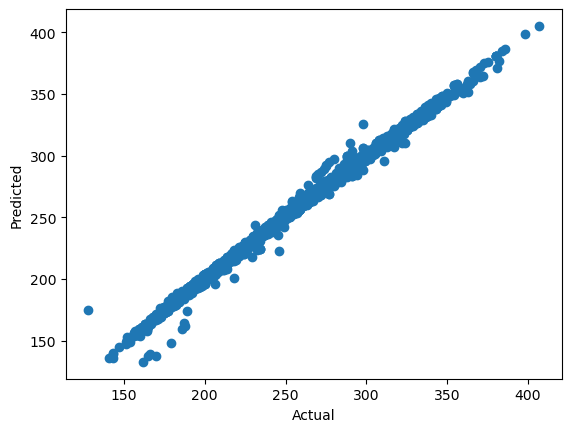

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [67]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Residual':y_test-y_pred})
residual=y_test-y_pred

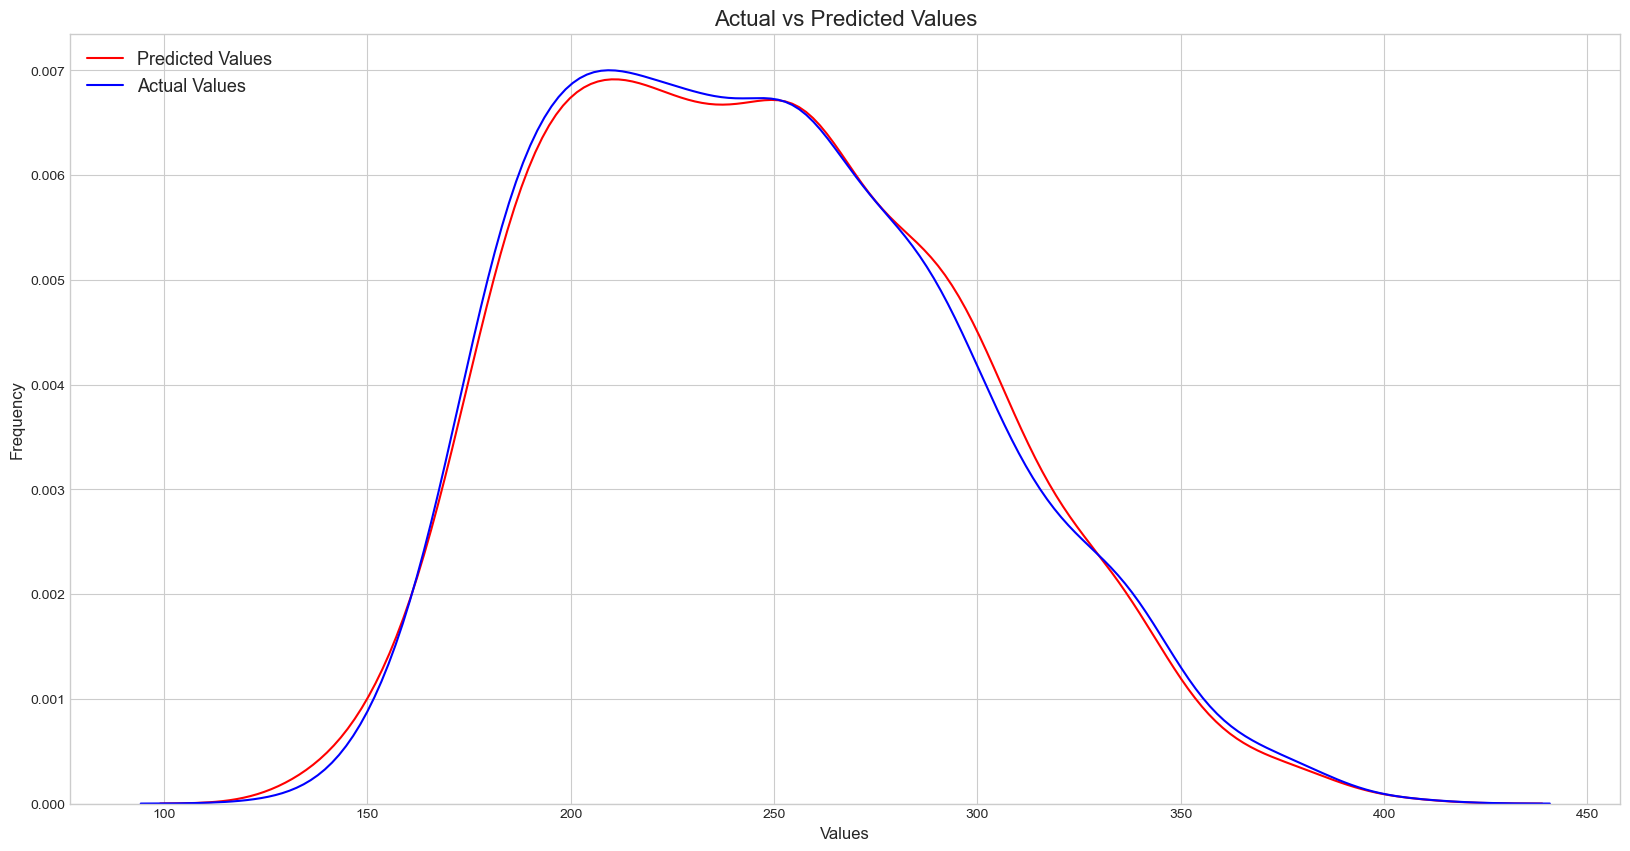

In [68]:
from matplotlib import style
import seaborn as sns
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [69]:
#Assumption 1:Multi Collinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif=[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))
    

In [72]:
pd.DataFrame({'vif':vif},index=data2.drop(["co2_emissions"],axis=1).columns)

,vif
engine_size,42.722933
cylinders,34.956189
fuel_consumption_city,3962.946590
fuel_consumption_hwy,1338.313710
fuel_consumption_comb(l/100km),8316.191382
fuel_consumption_comb(mpg),56.214334
transmission_Automated manual,1.401431
transmission_Automatic,1.862127
transmission_Continuously variable,1.513011
transmission_Manual,1.587185


In [73]:
pd.DataFrame({'vif':vif},index=data2.drop(["co2_emissions"],axis=1).columns) > 5

,vif
engine_size,True
cylinders,True
fuel_consumption_city,True
fuel_consumption_hwy,True
fuel_consumption_comb(l/100km),True
fuel_consumption_comb(mpg),True
transmission_Automated manual,False
transmission_Automatic,False
transmission_Continuously variable,False
transmission_Manual,False


In [ ]:
#drop the columns which have the VIF value > 5

In [74]:
data2=data2.drop(["engine_size","fuel_consumption_city","fuel_consumption_comb(l/100km)","fuel_type_Regular gasoline","fuel_consumption_hwy"],axis=1)

In [77]:
data2.head(2)

,cylinders,fuel_consumption_comb(mpg),co2_emissions,transmission_Automated manual,transmission_Automatic,transmission_Continuously variable,transmission_Manual,fuel_type_Ethanol (E85),fuel_type_Natural gas,fuel_type_Premium gasoline,make_1_Luxury,make_1_Premium,make_1_Sports,Vehicle_Class_Type_sedan,Vehicle_Class_Type_suv,Vehicle_Class_Type_truck
0,4,33,196,0,0,0,0,0,0,1,1,0,0,0,0,0
1,4,29,221,0,0,0,1,0,0,1,1,0,0,0,0,0


In [125]:
data2= data2.rename(columns={'fuel_consumption_comb(mpg)': 'fuel_consumption_comb_mpg', 'fuel_type_Ethanol (E85)': 'fuel_type_Ethanol','transmission_Automated manual':'transmission_Automatedmanual','transmission_Continuously variable':'transmission_Continuouslyvariable','fuel_type_Natural gas':'fuel_type_Naturalgas','fuel_type_Premium gasoline':'fuel_type_Premiumgasoline'})

In [126]:
data2.head(2)

,cylinders,fuel_consumption_comb_mpg,co2_emissions,transmission_Automatedmanual,transmission_Automatic,transmission_Continuouslyvariable,transmission_Manual,fuel_type_Ethanol,fuel_type_Naturalgas,fuel_type_Premiumgasoline,make_1_Luxury,make_1_Premium,make_1_Sports,Vehicle_Class_Type_sedan,Vehicle_Class_Type_suv,Vehicle_Class_Type_truck
0,4,33,196,0,0,0,0,0,0,1,1,0,0,0,0,0
1,4,29,221,0,0,0,1,0,0,1,1,0,0,0,0,0


In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler=MinMaxScaler()

In [129]:
from sklearn.model_selection import train_test_split

In [83]:
x=data2.drop(["co2_emissions"],axis=1)
y=data2["co2_emissions"]

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [131]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [134]:
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          co2_emissions   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              9160.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:31:58   Log-Likelihood:                         -21019.
No. Observations:                4066   AIC:                                  4.207e+04
Df Residuals:                    4051   BIC:                                  4.216e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Predicted')

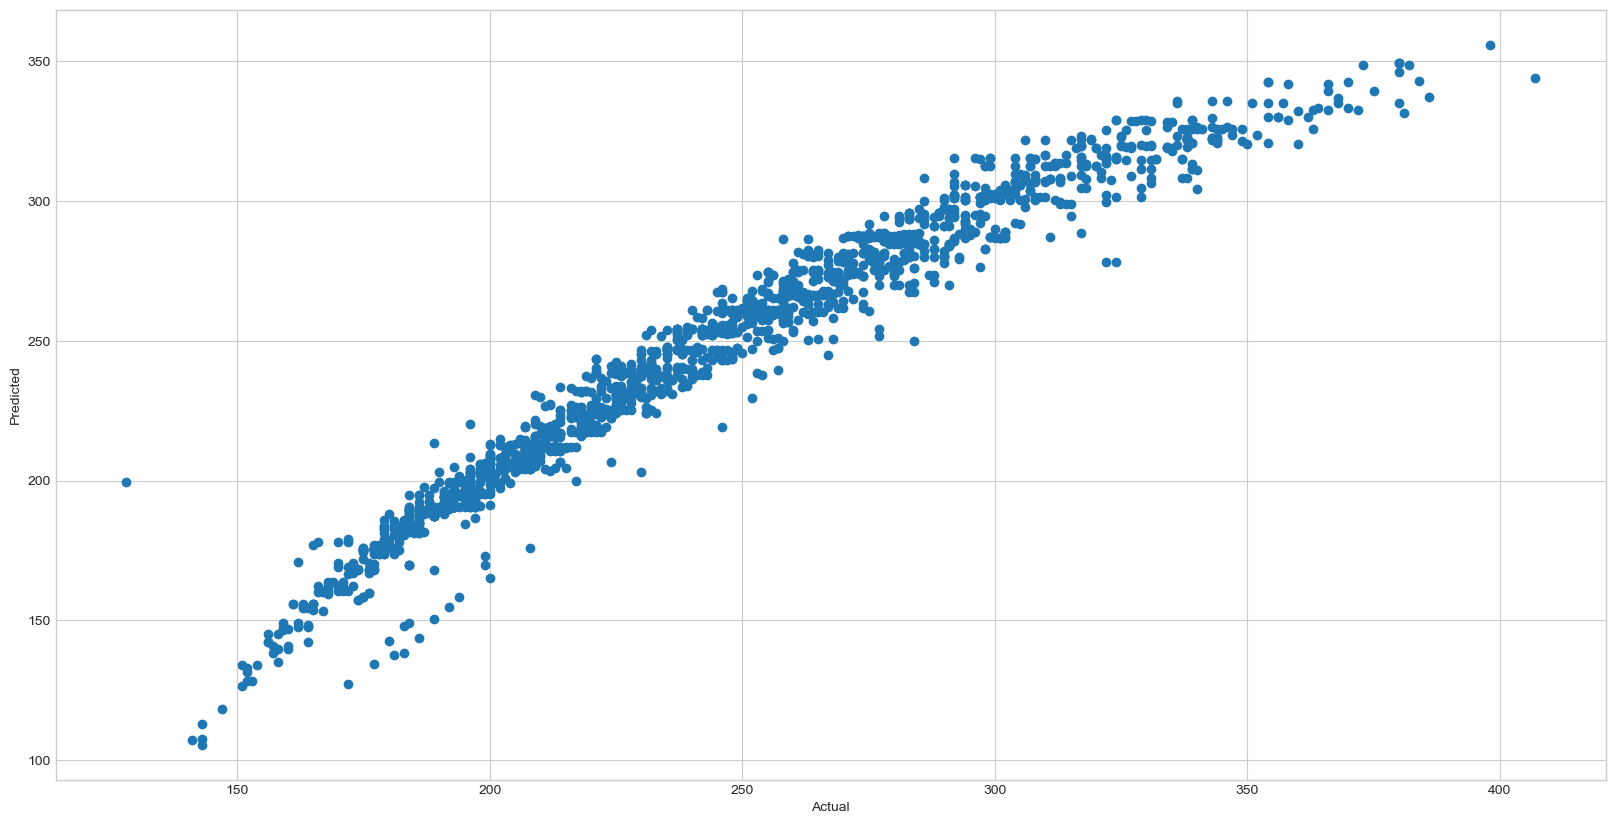

In [135]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [136]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Residual':y_test-y_pred})
residual=y_test-y_pred

In [137]:
pred_df

,Actual,Predicted,Residual
501,267,278.728065,-11.728065
3164,274,286.939589,-12.939589
3955,246,246.691612,-0.691612
5474,262,266.340680,-4.340680
4899,331,320.114700,10.885300
...,...,...,...
5480,280,273.080726,6.919274
4895,211,218.617587,-7.617587
5154,249,259.722393,-10.722393
1338,334,326.356516,7.643484


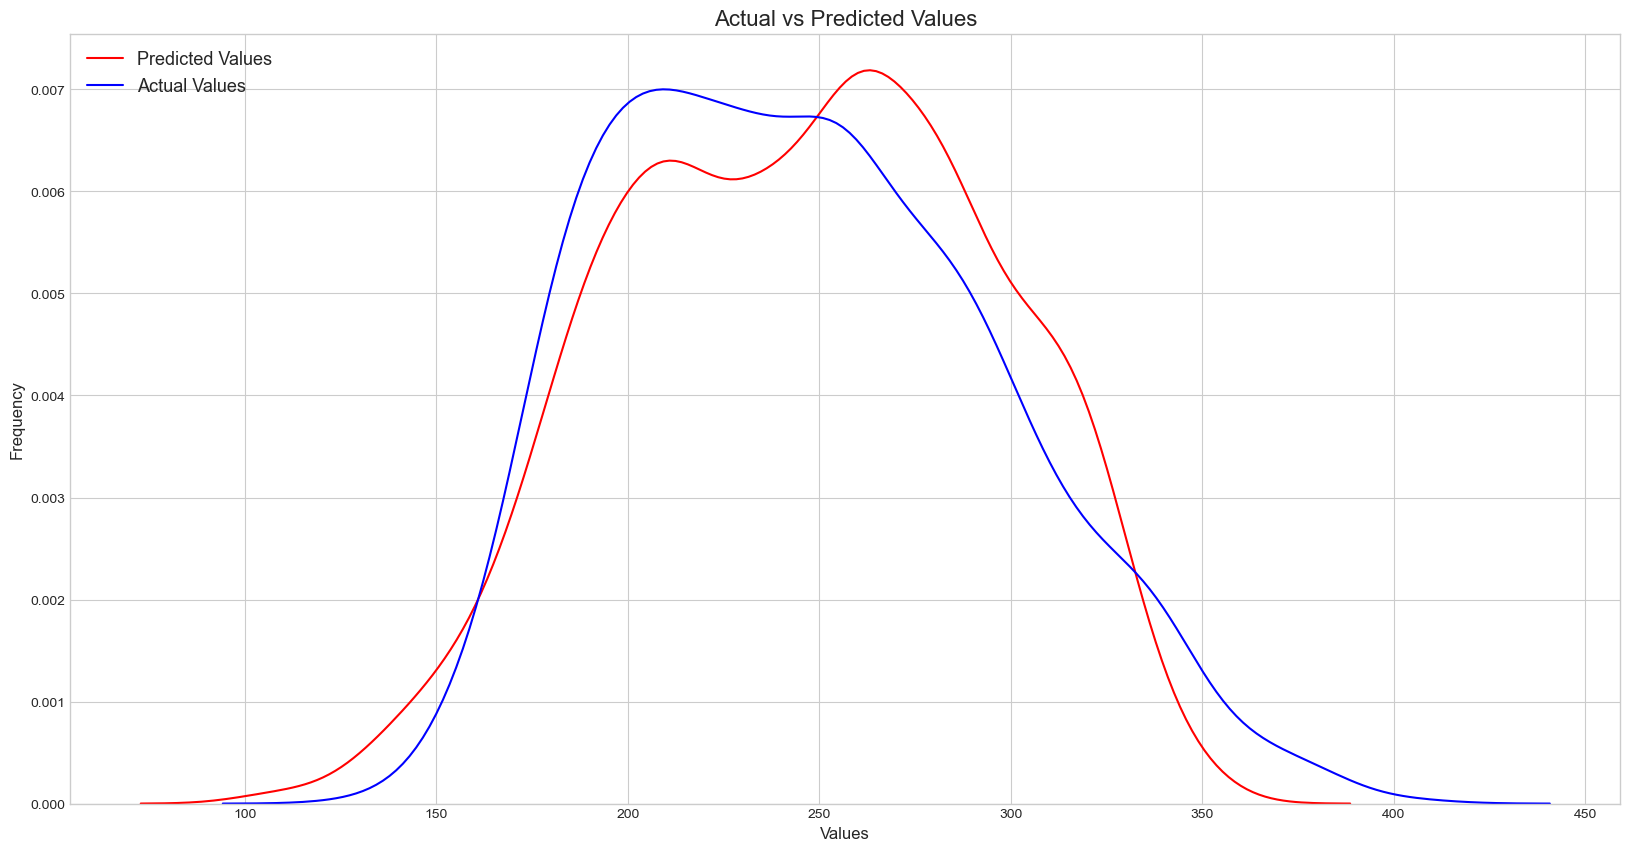

In [138]:
from matplotlib import style
import seaborn as sns
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [84]:
#This distribution plot reveals that our prediction values have performed almost precisely to our actual values 

In [80]:
#Assumption 1:Multi Collinearity

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif=[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))
    

In [141]:
pd.DataFrame({'vif':vif},index=data2.drop(["co2_emissions"],axis=1).columns)

,vif
cylinders,4.018991
fuel_consumption_comb_mpg,3.380581
transmission_Automatedmanual,1.359396
transmission_Automatic,1.807157
transmission_Continuouslyvariable,1.369151
transmission_Manual,1.497910
fuel_type_Ethanol,1.129389
fuel_type_Naturalgas,1.001584
fuel_type_Premiumgasoline,3.581889
make_1_Luxury,1.118738


In [93]:
#Normality in residuals

In [142]:
import scipy as sp

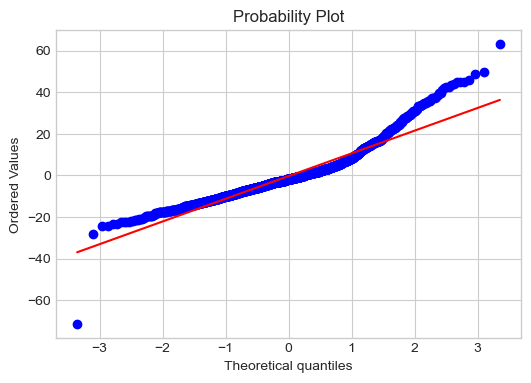

In [143]:
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

<Axes: xlabel='co2_emissions', ylabel='Density'>

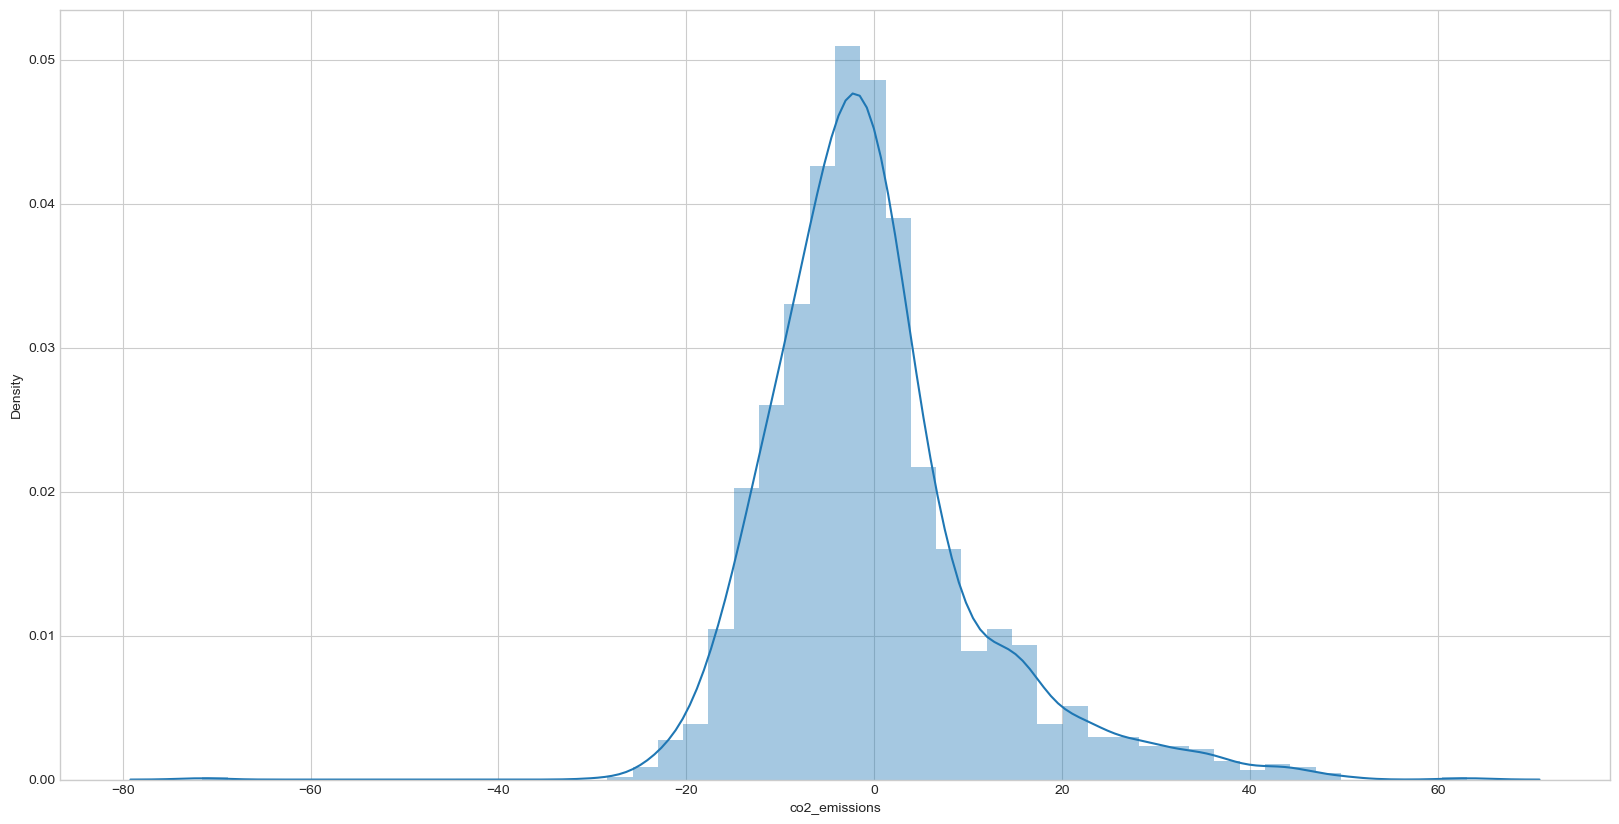

In [82]:
sns.distplot(residual)

In [104]:
#Homoscedasticity#errors are having same scatter

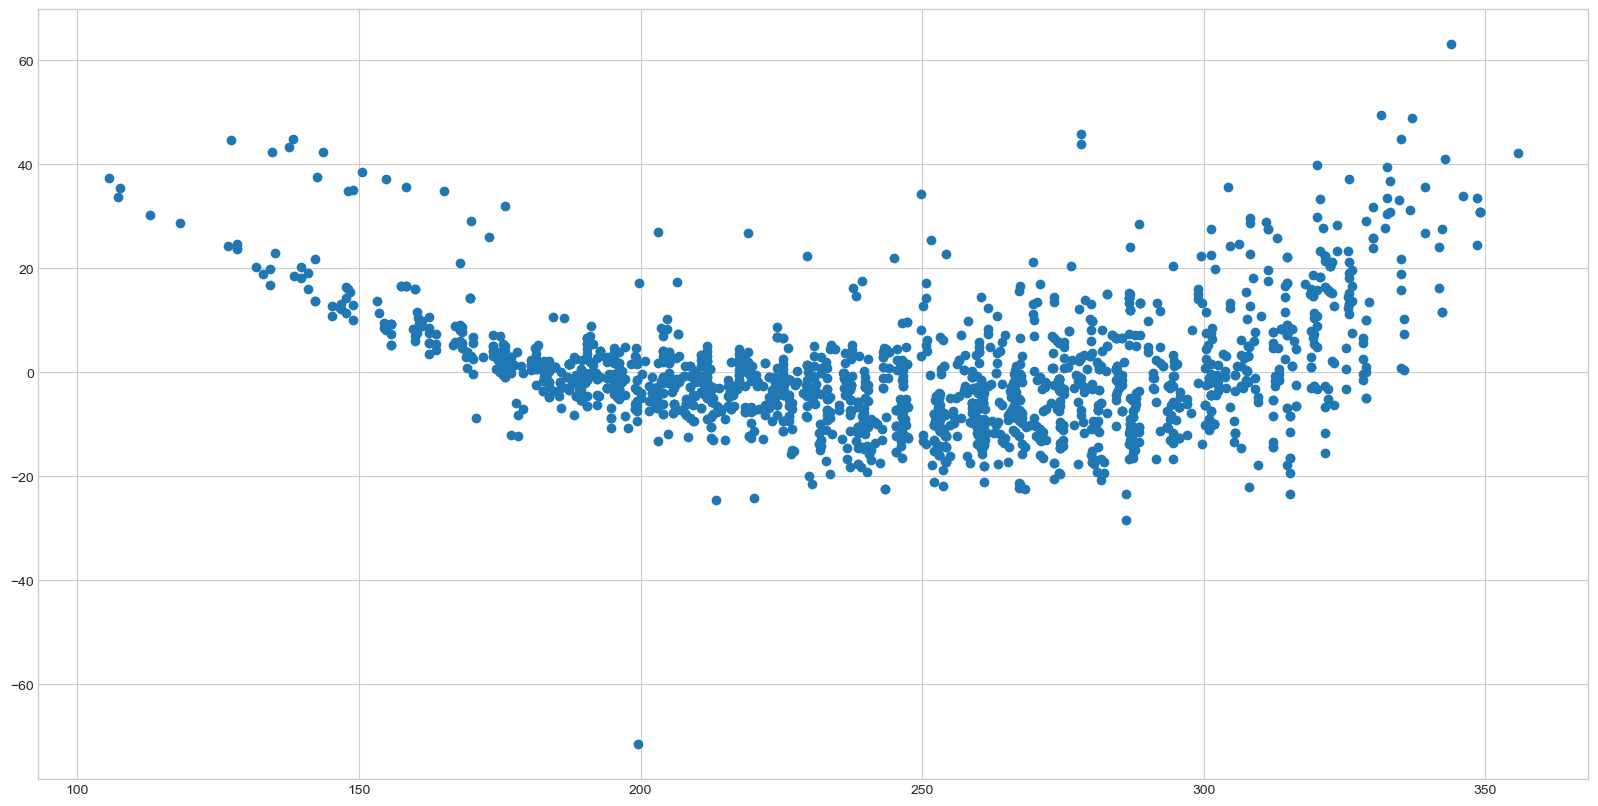

In [144]:
plt.scatter(y_pred,residual)

In [145]:
data2.head(2)

,cylinders,fuel_consumption_comb_mpg,co2_emissions,transmission_Automatedmanual,transmission_Automatic,transmission_Continuouslyvariable,transmission_Manual,fuel_type_Ethanol,fuel_type_Naturalgas,fuel_type_Premiumgasoline,make_1_Luxury,make_1_Premium,make_1_Sports,Vehicle_Class_Type_sedan,Vehicle_Class_Type_suv,Vehicle_Class_Type_truck
0,4,33,196,0,0,0,0,0,0,1,1,0,0,0,0,0
1,4,29,221,0,0,0,1,0,0,1,1,0,0,0,0,0


In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def check(model,x_train,y_train,x_test,y_test):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    return mae,mse,rmse,r2

In [147]:
mae=mean_absolute_error(y_test,y_pred)

In [148]:
mae

8.188447588387737

In [149]:
mse=mean_squared_error(y_test,y_pred)
mse

129.4345855615819

In [150]:
rmse=mean_squared_error(y_test,y_pred,squared=False)
rmse

11.37693216827726

In [151]:
r2=r2_score(y_test,y_pred)
r2

0.9483349573492028

In [152]:
x=data2.drop(["co2_emissions"],axis=1)
y=data2["co2_emissions"]

In [153]:
from sklearn.tree import DecisionTreeRegressor
model_decision=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=10,random_state=42)
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=42)
x_train1=scaler.fit_transform(x_train1)
x_test1=scaler.transform(x_test1)

In [109]:
model_decision.fit(x_train1,y_train1)
y_pred1=model_decision.predict(x_test1)
model_decision.score(x_test1,y_test1)

0.9865372044269681

In [154]:
mae1=mean_absolute_error(y_test1,y_pred1)
mae1
mse1=mean_squared_error(y_test1,y_pred1)
mse1
rmse1=mean_squared_error(y_test1,y_pred1,squared=False)
rmse1
r21=r2_score(y_test1,y_pred1)
r21


0.9865372044269681

In [155]:
mae1,mse1,rmse1,r21

(3.658398987104576, 33.7278607756804, 5.807569265680815, 0.9865372044269681)

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
model_rf=RandomForestRegressor()
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.3,random_state=42)
x_train2=scaler.fit_transform(x_train2)
x_test2=scaler.transform(x_test2)

In [158]:
model_rf.fit(x_train2,y_train2)

RandomForestRegressor()

In [159]:
y_pred2=model_rf.predict(x_test2)

In [160]:
model_rf.score(x_test2,y_test2)

0.9876244707890589

In [161]:
mae2=mean_absolute_error(y_test2,y_pred2)
mae2
mse2=mean_squared_error(y_test2,y_pred2)
mse2
rmse2=mean_squared_error(y_test2,y_pred2,squared=False)
rmse2
r22=r2_score(y_test2,y_pred2)
r22


0.9876244707890589

In [162]:
result={"model":["linear regression","Decision Tree","Random FOrest"],"MAE":[mae,mae1,mae2],"MSe":[mse,mse1,mse2],"RMSE":[rmse,rmse1,rmse2],'r2':[r2,r21,r22]}

In [163]:
pd.DataFrame(result)

,model,MAE,MSe,RMSE,r2
0,linear regression,8.188448,129.434586,11.376932,0.948335
1,Decision Tree,3.658399,33.727861,5.807569,0.986537
2,Random FOrest,3.516134,31.003971,5.568121,0.987624


In [164]:
import pickle
import streamlit as st
pickle.dump(model_rf,open('model_rf.pkl','wb'))

In [165]:
data2.columns

Index(['cylinders', 'fuel_consumption_comb_mpg', 'co2_emissions',
       'transmission_Automatedmanual', 'transmission_Automatic',
       'transmission_Continuouslyvariable', 'transmission_Manual',
       'fuel_type_Ethanol', 'fuel_type_Naturalgas',
       'fuel_type_Premiumgasoline', 'make_1_Luxury', 'make_1_Premium',
       'make_1_Sports', 'Vehicle_Class_Type_sedan', 'Vehicle_Class_Type_suv',
       'Vehicle_Class_Type_truck'],
      dtype='object')